## Importing Neccessary Libraries 

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import missingno as msn
import seaborn as sns 

## Importing Dataset

In [3]:
df =  pd.read_excel(r"C:\Users\benke\Hotel Prediction\CastAway Cruise Lines Data.xlsx")

## Data Investigation 

In [4]:
df.head()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Room Type,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction,Would you travel with us again?
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes


In [5]:
df.isnull().sum()

Total Cost                                        0
Room Costs                                        0
Ship BoardExpenses                                0
Casino Expenses                                   0
Excursion Expenses                                0
Room Type                                         0
Customer Satisfaction Average of All Questions    0
Overall Trip 1-5 Satisfaction                     0
Would you travel with us again?                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Total Cost                                      1050 non-null   float64
 1   Room Costs                                      1050 non-null   float64
 2   Ship BoardExpenses                              1050 non-null   float64
 3   Casino Expenses                                 1050 non-null   float64
 4   Excursion Expenses                              1050 non-null   float64
 5   Room Type                                       1050 non-null   object 
 6   Customer Satisfaction Average of All Questions  1050 non-null   float64
 7   Overall Trip 1-5 Satisfaction                   1050 non-null   int64  
 8   Would you travel with us again?                 1050 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory 

In [7]:
df.describe()

,Total Cost,Room Costs,Ship BoardExpenses,Casino Expenses,Excursion Expenses,Customer Satisfaction Average of All Questions,Overall Trip 1-5 Satisfaction
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,1127.041196,528.122936,388.822679,130.452392,149.626436,3.438381,3.469524
std,374.444832,235.103509,227.660449,211.962097,94.774713,1.220786,1.247887
min,306.066800,271.320000,1.980000,-286.110000,0.000000,0.500000,1.000000
25%,868.885000,351.120000,196.020000,-52.417500,71.234300,2.400000,2.000000
50%,1073.940000,486.680000,381.645000,110.600000,143.843200,3.400000,3.000000
75%,1322.461875,616.179200,583.961400,307.370000,219.809600,4.700000,5.000000
max,2823.501600,1559.446000,958.320000,779.733900,407.622600,5.000000,5.000000


In [8]:
# checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1045    False
1046    False
1047    False
1048    False
1049    False
Length: 1050, dtype: bool

In [9]:
# checking columns 
df.columns

Index(['Total Cost', 'Room Costs', 'Ship BoardExpenses ', 'Casino Expenses',
       'Excursion Expenses', 'Room Type',
       'Customer Satisfaction Average of All Questions',
       'Overall Trip 1-5 Satisfaction', 'Would you travel with us again?'],
      dtype='object')

In [10]:
# checking for whitespaces 
df.columns = df.columns.str.strip()

In [11]:
# result
df.columns

Index(['Total Cost', 'Room Costs', 'Ship BoardExpenses', 'Casino Expenses',
       'Excursion Expenses', 'Room Type',
       'Customer Satisfaction Average of All Questions',
       'Overall Trip 1-5 Satisfaction', 'Would you travel with us again?'],
      dtype='object')

In [12]:
df1 = df.rename(columns = {
    'Total Cost': 'Total_cost', 
    'Room Costs': 'Room_costs', 
    'Ship BoardExpenses': 'Ship_board_expenses',
    'Casino Expenses': 'Casino_expenses', 
    'Excursion Expenses': 'Excursion_expenses', 
    'Room Type': 'Room_type',
    'Customer Satisfaction Average of All Questions': 'Customer_satisfaction_average_of_all_questions',
    'Overall Trip 1-5 Satisfaction': 'Overall_trip_satisfaction', 
    'Would you travel with us again?': 'Would_you_travel_with_us_again'
}, inplace = True)


In [13]:
df.head()

,Total_cost,Room_costs,Ship_board_expenses,Casino_expenses,Excursion_expenses,Room_type,Customer_satisfaction_average_of_all_questions,Overall_trip_satisfaction,Would_you_travel_with_us_again
0,2513.1275,910.9364,912.3840,405.5781,284.2290,Balcony,5.0,5,Yes
1,2417.3518,742.8454,857.6568,476.8440,340.0056,Balcony,3.1,3,Yes
2,2315.6382,747.2586,816.7500,507.6540,243.9756,Balcony,5.0,5,Yes
3,2291.4427,889.0651,790.8714,493.1022,118.4040,Balcony,4.5,5,Yes
4,2244.2013,753.8784,749.4795,485.4234,255.4200,Balcony,5.0,5,Yes


In [14]:
# extracting numerical columns
cat_cols = df.select_dtypes(include =['object'])

In [15]:
cat_cols

,Room_type,Would_you_travel_with_us_again
0,Balcony,Yes
1,Balcony,Yes
2,Balcony,Yes
3,Balcony,Yes
4,Balcony,Yes
...,...,...
1045,Window,No
1046,Window,No
1047,Window,No
1048,Window,No


In [16]:
# extract categorical columns

num_cols = df.select_dtypes(include =['int', 'float'])

In [17]:
num_cols

,Total_cost,Room_costs,Ship_board_expenses,Casino_expenses,Excursion_expenses,Customer_satisfaction_average_of_all_questions,Overall_trip_satisfaction
0,2513.1275,910.9364,912.3840,405.5781,284.2290,5.0,5
1,2417.3518,742.8454,857.6568,476.8440,340.0056,3.1,3
2,2315.6382,747.2586,816.7500,507.6540,243.9756,5.0,5
3,2291.4427,889.0651,790.8714,493.1022,118.4040,4.5,5
4,2244.2013,753.8784,749.4795,485.4234,255.4200,5.0,5
...,...,...,...,...,...,...,...
1045,516.8057,488.7960,45.4608,-71.1711,53.7200,1.9,2
1046,482.0293,433.1452,168.4980,-146.3949,26.7810,2.3,2
1047,412.7553,528.5239,53.9550,-187.5776,17.8540,2.9,3
1048,379.7558,404.8966,148.9752,-219.7780,45.6620,3.7,4


In [18]:
# checking for negative values

negative_values = num_cols[num_cols < 0]

print(negative_values)

      Total_cost  Room_costs  Ship_board_expenses  Casino_expenses  \
0            NaN         NaN                  NaN              NaN   
1            NaN         NaN                  NaN              NaN   
2            NaN         NaN                  NaN              NaN   
3            NaN         NaN                  NaN              NaN   
4            NaN         NaN                  NaN              NaN   
...          ...         ...                  ...              ...   
1045         NaN         NaN                  NaN         -71.1711   
1046         NaN         NaN                  NaN        -146.3949   
1047         NaN         NaN                  NaN        -187.5776   
1048         NaN         NaN                  NaN        -219.7780   
1049         NaN         NaN                  NaN        -186.3215   

      Excursion_expenses  Customer_satisfaction_average_of_all_questions  \
0                    NaN                                             NaN   
1      

In [19]:
# Select the 'Casino_expenses' column
casino_expenses = num_cols['Casino_expenses']

# Calculate the mean of 'Casino_expenses'
mean_value = casino_expenses[casino_expenses >= 0].mean()  # Mean of non-negative values

# Replace negative values in 'Casino_expenses' with the mean
num_cols['Casino_expenses'] = casino_expenses.apply(lambda x: mean_value if x < 0 else x)

# Display the updated DataFrame
print(df['Casino_expenses'])


0       405.5781
1       476.8440
2       507.6540
3       493.1022
4       485.4234
          ...   
1045    -71.1711
1046   -146.3949
1047   -187.5776
1048   -219.7780
1049   -186.3215
Name: Casino_expenses, Length: 1050, dtype: float64


In [20]:
# checking for negative values

negative_values = num_cols[num_cols < 0]

print(negative_values)

      Total_cost  Room_costs  Ship_board_expenses  Casino_expenses  \
0            NaN         NaN                  NaN              NaN   
1            NaN         NaN                  NaN              NaN   
2            NaN         NaN                  NaN              NaN   
3            NaN         NaN                  NaN              NaN   
4            NaN         NaN                  NaN              NaN   
...          ...         ...                  ...              ...   
1045         NaN         NaN                  NaN              NaN   
1046         NaN         NaN                  NaN              NaN   
1047         NaN         NaN                  NaN              NaN   
1048         NaN         NaN                  NaN              NaN   
1049         NaN         NaN                  NaN              NaN   

      Excursion_expenses  Customer_satisfaction_average_of_all_questions  \
0                    NaN                                             NaN   
1      

# Exploratory Data Analysis

- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

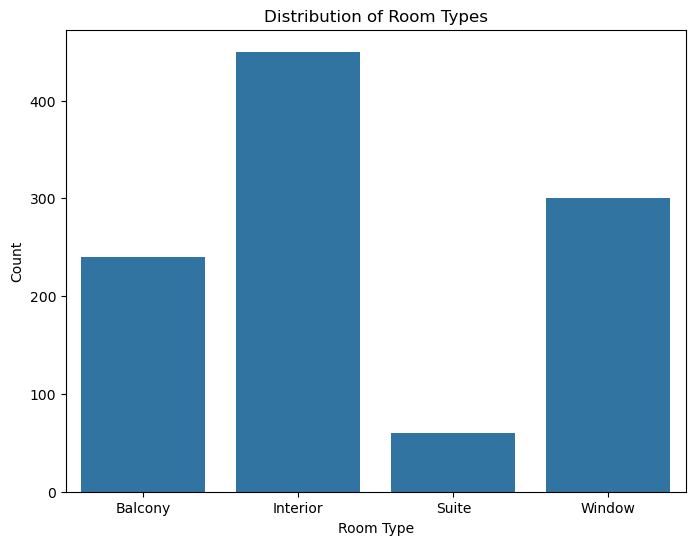

In [21]:
# Assuming 'Room_type' is in cat_cols DataFrame
plt.figure(figsize=(8, 6))

# Create a bar chart using seaborn
sns.countplot(x='Room_type', data=cat_cols)

# Add titles and labels
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Display the plot
plt.show()

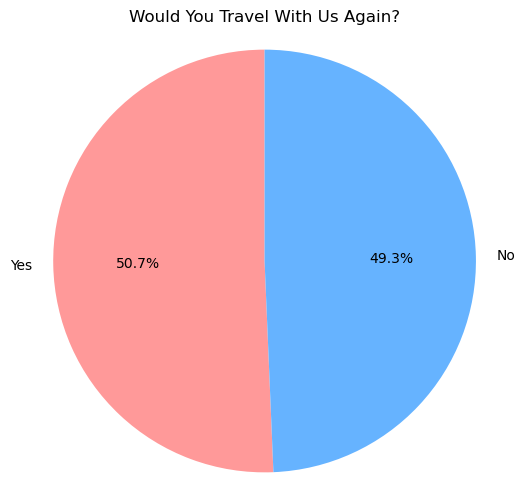

In [22]:
# Count the occurrences of each category
travel_counts = cat_cols['Would_you_travel_with_us_again'].value_counts()

# Create a pie chart with reduced figsize and vibrant colors
plt.figure(figsize=(6, 6))  # Reduced figure size
plt.pie(travel_counts, labels=travel_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])  # Vibrant colors
plt.title('Would You Travel With Us Again?')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


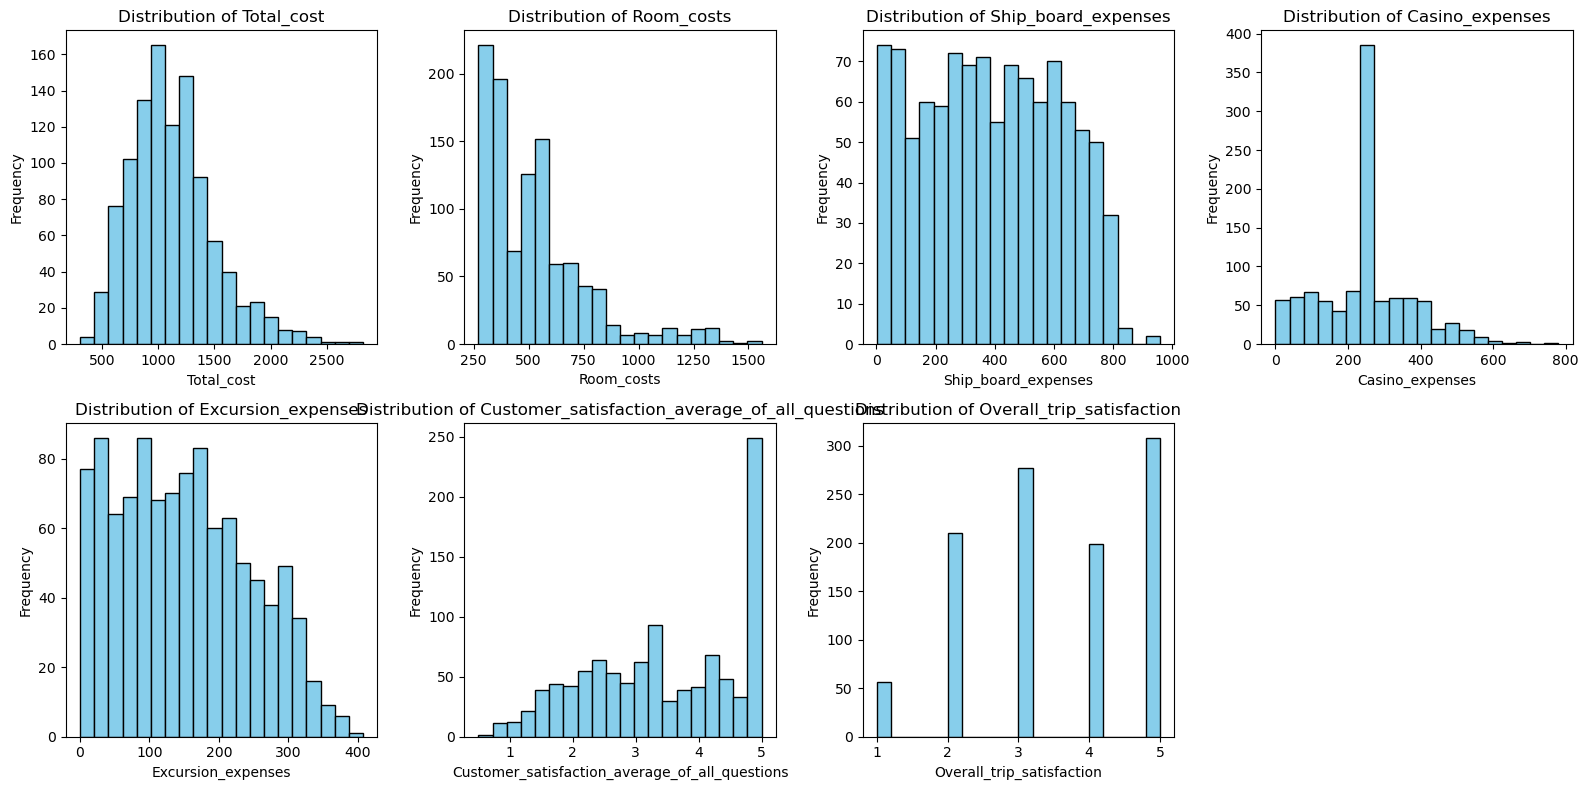

In [23]:
# Number of numerical columns
num_columns = len(num_cols.columns)

# Create subplots with a 2 by 4 layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical column and create a histogram
for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots if there are fewer than 8 columns
for j in range(num_columns, 8):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## Bivariate Analysis 

In [24]:
df.columns

Index(['Total_cost', 'Room_costs', 'Ship_board_expenses', 'Casino_expenses',
       'Excursion_expenses', 'Room_type',
       'Customer_satisfaction_average_of_all_questions',
       'Overall_trip_satisfaction', 'Would_you_travel_with_us_again'],
      dtype='object')

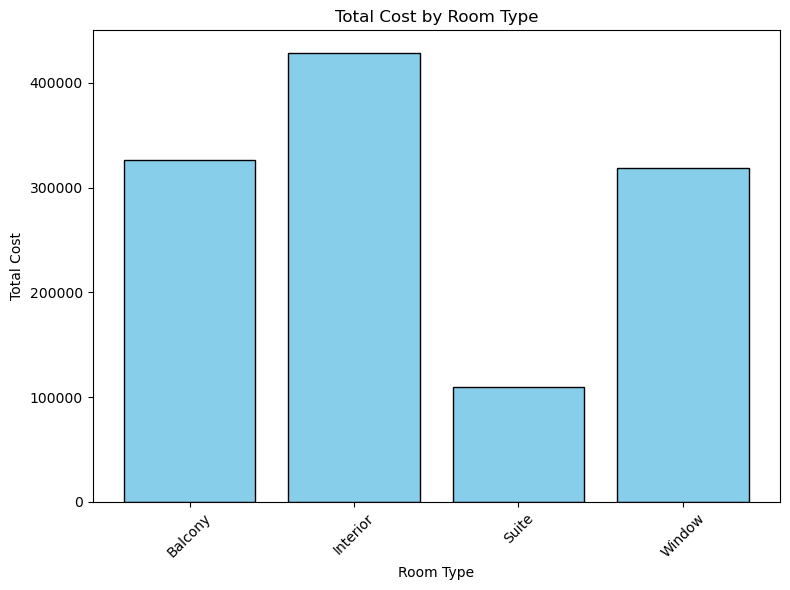

In [25]:
# total cost by room time
# Group by room type and sum the total cost
total_cost_by_room = df.groupby('Room_type')['Total_cost'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(total_cost_by_room['Room_type'], total_cost_by_room['Total_cost'], color='skyblue', edgecolor='black')
plt.title('Total Cost by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


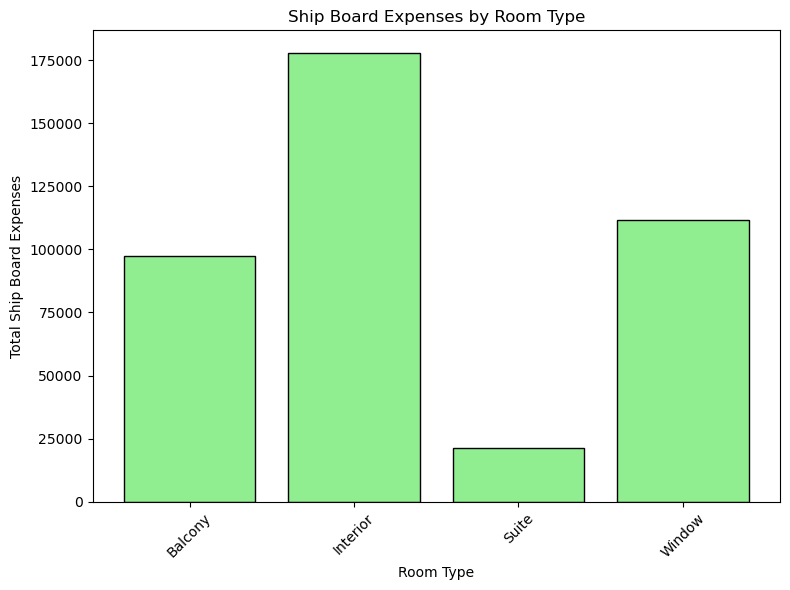

In [26]:
# Group by room type and sum the shipboard expenses
shipboard_expenses_by_room = df.groupby('Room_type')['Ship_board_expenses'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(shipboard_expenses_by_room['Room_type'], shipboard_expenses_by_room['Ship_board_expenses'], color='lightgreen', edgecolor='black')
plt.title('Ship Board Expenses by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Ship Board Expenses')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


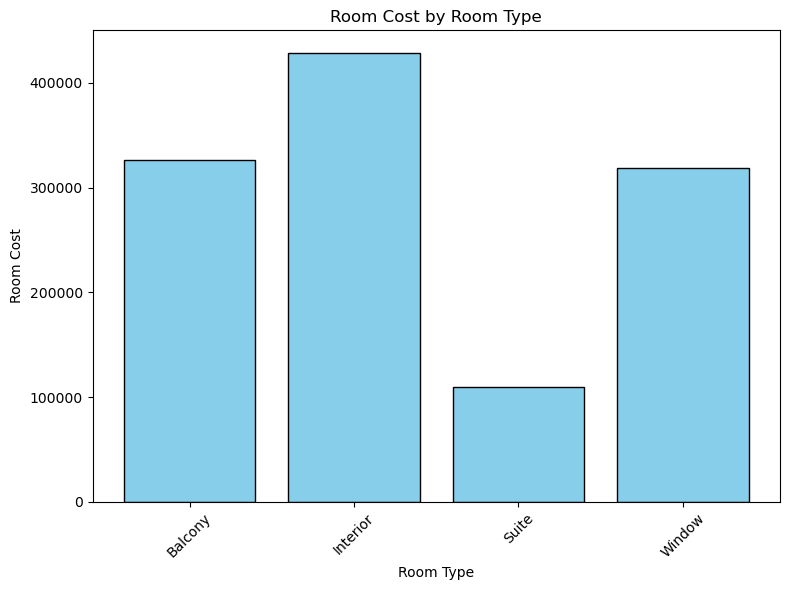

In [27]:
# Room cost vs room type 
# Group by room type and sum the total cost
room_cost_by_room_type = df.groupby('Room_type')['Room_costs'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(total_cost_by_room['Room_type'], total_cost_by_room['Total_cost'], color='skyblue', edgecolor='black')
plt.title('Room Cost by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Room Cost')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

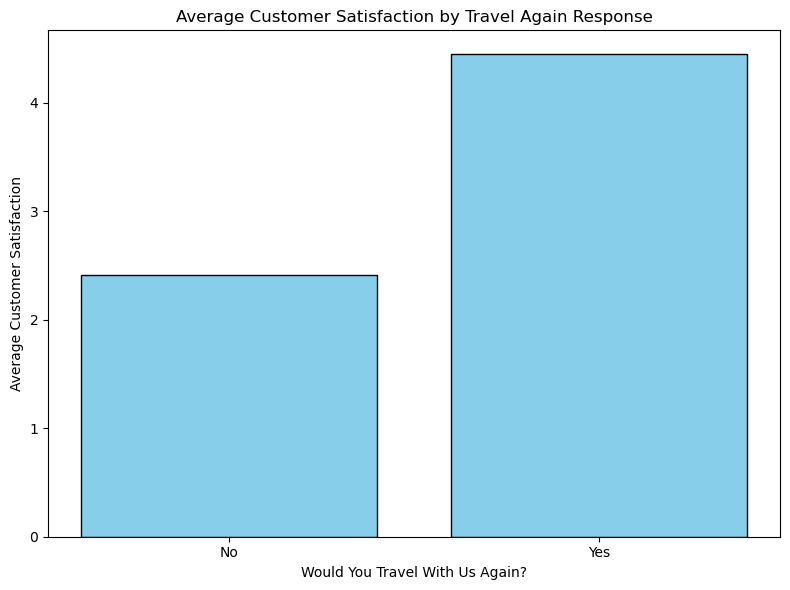

In [28]:
# Calculate the average customer satisfaction for each category
avg_satisfaction = df.groupby('Would_you_travel_with_us_again')['Customer_satisfaction_average_of_all_questions'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_satisfaction['Would_you_travel_with_us_again'], avg_satisfaction['Customer_satisfaction_average_of_all_questions'], color='skyblue', edgecolor='black')
plt.title('Average Customer Satisfaction by Travel Again Response')
plt.xlabel('Would You Travel With Us Again?')
plt.ylabel('Average Customer Satisfaction')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## Multivariate Analysis

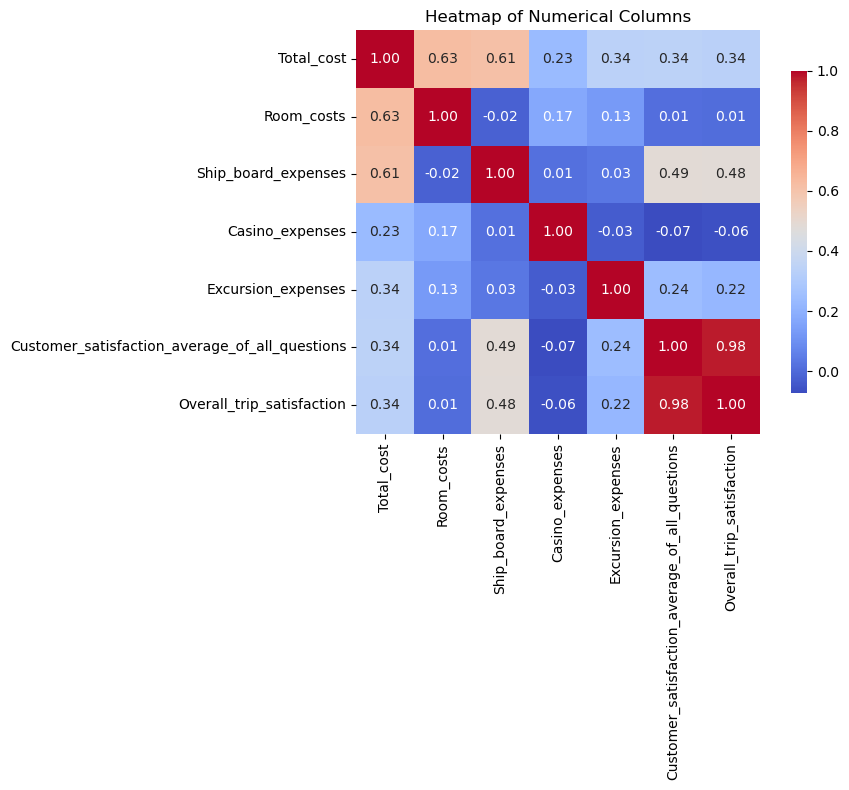

In [29]:
# Calculate the correlation matrix
correlation_matrix = num_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Numerical Columns')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [30]:
# concatenating numerical and categorical colums
df1 = pd.concat([num_cols, cat_cols], axis=1)

# Display the concatenated DataFrame
print(df1)

      Total_cost  Room_costs  Ship_board_expenses  Casino_expenses  \
0      2513.1275    910.9364             912.3840       405.578100   
1      2417.3518    742.8454             857.6568       476.844000   
2      2315.6382    747.2586             816.7500       507.654000   
3      2291.4427    889.0651             790.8714       493.102200   
4      2244.2013    753.8784             749.4795       485.423400   
...          ...         ...                  ...              ...   
1045    516.8057    488.7960              45.4608       247.050924   
1046    482.0293    433.1452             168.4980       247.050924   
1047    412.7553    528.5239              53.9550       247.050924   
1048    379.7558    404.8966             148.9752       247.050924   
1049    306.0668    406.2720              57.2418       247.050924   

      Excursion_expenses  Customer_satisfaction_average_of_all_questions  \
0               284.2290                                             5.0   
1      

In [31]:
# Renaming the target column

df1 = df1.rename(columns={'Would_you_travel_with_us_again': 'Travel_Again'})

# Display the updated DataFrame
print(df1)

      Total_cost  Room_costs  Ship_board_expenses  Casino_expenses  \
0      2513.1275    910.9364             912.3840       405.578100   
1      2417.3518    742.8454             857.6568       476.844000   
2      2315.6382    747.2586             816.7500       507.654000   
3      2291.4427    889.0651             790.8714       493.102200   
4      2244.2013    753.8784             749.4795       485.423400   
...          ...         ...                  ...              ...   
1045    516.8057    488.7960              45.4608       247.050924   
1046    482.0293    433.1452             168.4980       247.050924   
1047    412.7553    528.5239              53.9550       247.050924   
1048    379.7558    404.8966             148.9752       247.050924   
1049    306.0668    406.2720              57.2418       247.050924   

      Excursion_expenses  Customer_satisfaction_average_of_all_questions  \
0               284.2290                                             5.0   
1      

In [32]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode 'TravelAgain' column
df1['Travel_Again'] = label_encoder.fit_transform(df1['Travel_Again'])

# Encode 'Room Type' column
df1['Room_type'] = label_encoder.fit_transform(df1['Room_type'])

# Display the updated DataFrame
print(df1.head())

   Total_cost  Room_costs  Ship_board_expenses  Casino_expenses  \
0   2513.1275    910.9364             912.3840         405.5781   
1   2417.3518    742.8454             857.6568         476.8440   
2   2315.6382    747.2586             816.7500         507.6540   
3   2291.4427    889.0651             790.8714         493.1022   
4   2244.2013    753.8784             749.4795         485.4234   

   Excursion_expenses  Customer_satisfaction_average_of_all_questions  \
0            284.2290                                             5.0   
1            340.0056                                             3.1   
2            243.9756                                             5.0   
3            118.4040                                             4.5   
4            255.4200                                             5.0   

   Overall_trip_satisfaction  Room_type  Travel_Again  
0                          5          0             1  
1                          3          0       

## Feature Selection

In [33]:
# independent features
X = df1.drop(columns = ['Travel_Again'], axis = 1)


In [34]:
# dependent variable
y = df1['Travel_Again']

In [35]:
y.value_counts()

Travel_Again
1    532
0    518
Name: count, dtype: int64

In [36]:
# splitting data into test_train

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (840, 8)
X_test shape: (210, 8)
y_train shape: (840,)
y_test shape: (210,)


In [37]:
# scaling my data using MinMax Scaler 

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled datasets
print(f'Scaled Train features shape: {X_train_scaled.shape}')
print(f'Scaled Test features shape: {X_test_scaled.shape}')


Scaled Train features shape: (840, 8)
Scaled Test features shape: (210, 8)


## Model Selection

- Logistic Regression
- Support Vector Machine
- Random Forest

In [38]:
# importing libraries for model training

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

from sklearn.metrics import accuracy_score

In [39]:
# training using Logistic Regression

#initializing the model

Log_model = LogisticRegression()

# fit the model on the data

Log_model.fit(X_train_scaled, y_train)

# making predictions 

Log_pred = Log_model.predict(X_test_scaled)

In [40]:
# Checking the accuracy 

accuracy = accuracy_score(y_test, Log_pred)

# Print the accuracy
print(f'The accuracy of the Logistic Regression Model is {accuracy*100:.2f} %')

The accuracy of the Logistic Regression Model is 95.24 %


## Support Vector Machine

In [41]:
# initializing model

svm_model = SVC()

# fitting the model to the dataset

svm_model.fit(X_train_scaled, y_train)

# predicting

svm_pred = svm_model.predict(X_test_scaled)

In [42]:
# calculating accuracy for SVM

accuracy = accuracy_score (y_test, svm_pred)

# Print the accuracy
print(f'The accuracy of Support Vector Machine Model is {accuracy*100:.2f} %')

The accuracy of Support Vector Machine Model is 95.71 %


## Random Forest 

In [43]:
# initializing model

random_model = RandomForestClassifier()

# fitting the model

random_model.fit(X_train_scaled, y_train)

# making predictions

random_predict = random_model.predict(X_test_scaled)

In [44]:
# calculating accuracy

accuracy_ran = accuracy_score(y_test, random_predict)

# print accuracy
print(f'The accuracy of Random Forest Classifier Model is {accuracy*100:.2f} %')

The accuracy of Random Forest Classifier Model is 95.71 %


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0      0.927     0.967     0.947        92
           1      0.974     0.941     0.957       118

    accuracy                          0.952       210
   macro avg      0.950     0.954     0.952       210
weighted avg      0.953     0.952     0.952       210



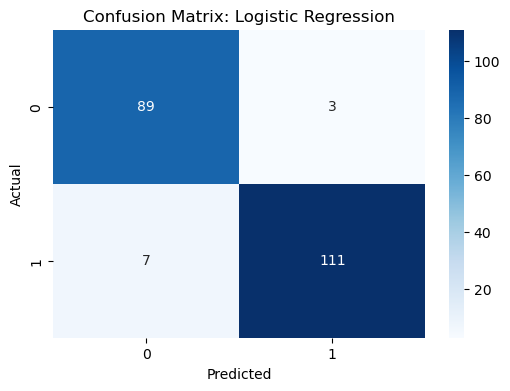

SVM Classification Report:
              precision    recall  f1-score   support

           0      0.937     0.967     0.952        92
           1      0.974     0.949     0.961       118

    accuracy                          0.957       210
   macro avg      0.955     0.958     0.957       210
weighted avg      0.958     0.957     0.957       210



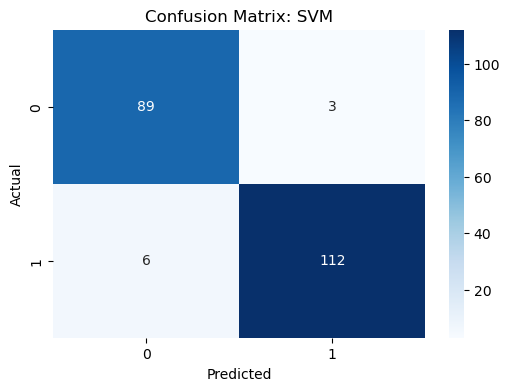

Random Forest Classification Report:
              precision    recall  f1-score   support

           0      0.957     0.957     0.957        92
           1      0.966     0.966     0.966       118

    accuracy                          0.962       210
   macro avg      0.961     0.961     0.961       210
weighted avg      0.962     0.962     0.962       210



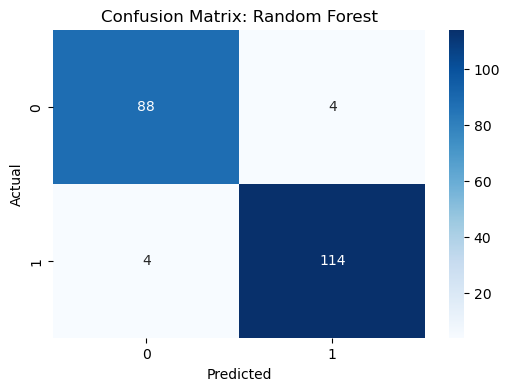

                 Model  Accuracy  Precision (1)  Recall (1)  F1-Score (1)
0  Logistic Regression     0.952          0.974       0.941         0.957
1                  SVM     0.957          0.974       0.949         0.961
2        Random Forest     0.962          0.966       0.966         0.966


In [45]:
# Create a list of model names
model_names = ['Logistic Regression', 'SVM', 'Random Forest']
models = [Log_model, svm_model, random_model]

# Initialize an empty list to store model performance metrics
model_scores = []

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print the classification report with the specified number of decimal places
    formatted_report = classification_report(y_test, y_pred, digits=decimal_places)
    print(f'{model_names[i]} Classification Report:\n{formatted_report}')
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the model's accuracy, precision, recall, and F1-score for class '1'
    model_scores.append({
        'Model': model_names[i],
        'Accuracy': round(accuracy, decimal_places),
        'Precision (1)': round(report['1']['precision'], decimal_places),
        'Recall (1)': round(report['1']['recall'], decimal_places),
        'F1-Score (1)': round(report['1']['f1-score'], decimal_places)
    })
    
    # Create a new figure for each confusion matrix to avoid overlapping
    plt.figure(figsize=(6, 4))
    
    # Add a heatmap style to the confusion matrix plot
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert the model scores into a DataFrame
df_scores = pd.DataFrame(model_scores)

# Display the DataFrame of model scores
print(df_scores)


## Feature Engineering using Random Forest Classifier

In [46]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

Customer_satisfaction_average_of_all_questions: 0.43
Overall_trip_satisfaction: 0.34
Ship_board_expenses: 0.06
Excursion_expenses: 0.05
Total_cost: 0.04
Room_costs: 0.04
Casino_expenses: 0.02
Room_type: 0.01


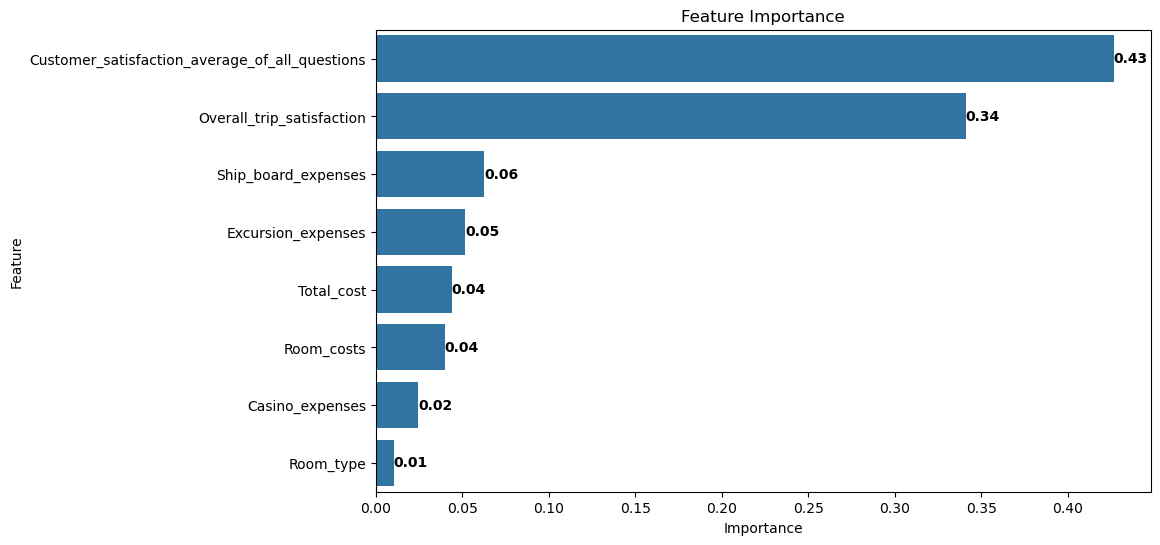

In [47]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

In [48]:
X_train.columns

Index(['Total_cost', 'Room_costs', 'Ship_board_expenses', 'Casino_expenses',
       'Excursion_expenses', 'Customer_satisfaction_average_of_all_questions',
       'Overall_trip_satisfaction', 'Room_type'],
      dtype='object')

In [49]:
# Resplitting data into training and testing sets (e.g. 80-20 split)

# List of top features from feature engineering
top_features = ['Customer_satisfaction_average_of_all_questions', 'Overall_trip_satisfaction', 'Ship_board_expenses']

# Select only the top features from the dataset
X_top_features = X[top_features]

# Resplit the data using the top features
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)



In [50]:
# Initializing Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fitting the model
random_model.fit(X_train, y_train)

# Making predictions on the test set
random_forest_predictions = random_model.predict(X_test)

# Calculating accuracy
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print(f'Random Forest Accuracy with Top Features: {random_forest_accuracy*100:.2f}%')


Random Forest Accuracy with Top Features: 93.81%


In [51]:
# Saving baseline model

import pickle
pickle_out = open('classifier.pkl', mode = 'wb')
pickle.dump(random_model, pickle_out)
pickle_out.close()